In [179]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


data = pd.read_csv('dane_proj.csv', encoding='ISO-8859-1')
data = data.rename(
  columns={'iyear':'year', 'imonth':'month', 'iday':'day',
          'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
        'weaptype1_txt':'weapon'})

data.head()

,year,month,day,country,country,region,region_txt,state,city,attacktype1,...,targsubtype1,targsubtype1_txt,corp1,weaptype1,weapon,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2000,1,1,1003,Kosovo,9,Eastern Europe,Kosovo (Province),Peje,3,...,76.0,House/Apartment/Residence,Civilians,6,Explosives,NaN,NaN,NaN,NaN,NaN
1,2000,1,1,1003,Kosovo,9,Eastern Europe,Kosovo (Province),Gorazhdec,2,...,71.0,Race/Ethnicity Identified,Civilians,5,Firearms,NaN,NaN,NaN,NaN,NaN
2,2000,1,1,185,Spain,8,Western Europe,Basque Country,Galdacano,2,...,27.0,Military Barracks/Base/Headquarters/Checkpost,Spanish Civil Guard,8,Incendiary,NaN,NaN,NaN,NaN,NaN
3,2000,1,1,185,Spain,8,Western Europe,Basque Country,Guernica,2,...,3.0,Bank/Commerce,Bank,8,Incendiary,NaN,NaN,NaN,NaN,NaN
4,2000,1,2,75,Germany,8,Western Europe,Thuringia,Erfurt,2,...,18.0,Government Personnel (excluding police,military),Thuringian Interior Ministry,8,Incendiary,NaN,NaN,NaN,NaN


# What percentage of attacks took place in Eastern Europe?

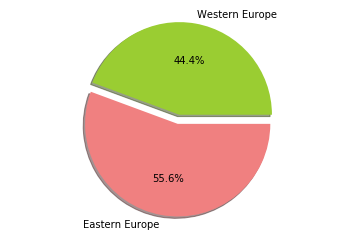

In [86]:

E_E=0
W_E=0


for item in data.region_txt:
 
    if item == "Western Europe":
        W_E=W_E+1
    if item == "Eastern Europe":
        E_E=E_E+1

        
lista = [W_E, E_E]  
suma=sum(lista)



labels = ["Western Europe",  "Eastern Europe"]
sizes = [W_E/suma, E_E/suma]
colors = ["yellowgreen", "lightcoral"]
explode = (0, 0.1)#tylko 2 wycienek zostanieodsuniety
plt.pie( sizes, explode =explode, labels = labels,colors = colors, autopct ="%1.1f%%", shadow = True )
plt.axis( "equal" )
plt.show()

# Which types of weapons were the most used?

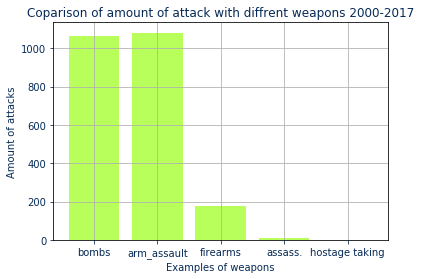

In [68]:
bombs=0
a_ass=0
firearms=0
assassination=0
biological=0
kiddnaping=0


for attack in data['weapon'].values:
    if attack == 3:
        bombs+=1
    elif attack == 2:
        a_ass+=1
    elif attack == 5:
        firearms+=1
    elif attack == 1:
        assassination+=1
    elif attack==6 or attack == 5:
        kiddnaping+=1

        
        
        
xaxis = ['bombs', 'arm_assault', 'firearms', 'assass.', 'hostage taking'] 
yaxis = [bombs, a_ass, firearms, assassination, kiddnaping]       


plt.tick_params(axis = 'x', colors = '#072b57')
plt.tick_params(axis = 'y', colors = '#072b57')

rects = plt.bar(xaxis, yaxis, align = 'center', color = '#b8ff5c') 


plt.xlabel('Examples of weapons', color = '#072b57')
plt.ylabel('Amount of attacks', color = '#072b57')
plt.title('Coparison of amount of attack with diffrent weapons 2000-2017', color = '#072b57')

plt.grid(True)
plt.show()





# What is the relationship between the number of attacks and the month of their occurrence?

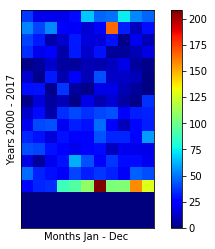

In [71]:

x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = np.linspace(2000, 2017, 17 )
X, Y = np.meshgrid( x, y )

r=2000
indeks=0
poczatek=0
rok=[]
iteratpr=0
calosc=[]
iterator=0

wycinek_danych = []
for element in data['month']:
    wycinek_danych.append(element)
    

for element in data['year'].values:
    if element == r:
        indeks+=1
    else:
        r+=1
        month=1
        for i in range(1,12):
            rok.append(wycinek_danych[poczatek:poczatek+indeks].count(i))
        calosc.append(rok)
        rok=[]
        poczatek+=indeks
        indeks=0
    if r == 2018:
        break
                

plt.imshow( calosc, cmap = "jet" )
plt.colorbar()
plt.xticks( [] )
plt.yticks( [] )
plt.xlabel('Months Jan - Dec ')             
plt.ylabel("Years 2000 - 2017")
plt.show()

# How many attacks were from 2000 to 2017 in Western and Eastern Europe?

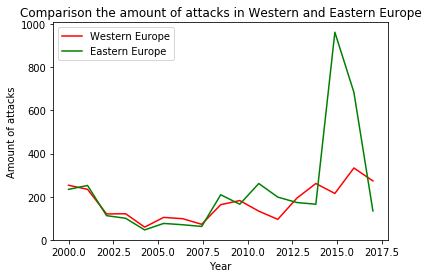

In [96]:
europa_wschodnia = []
europa_zachodnia = []
region=[]
podsumowanie_zach=[]
podsumowanie_wsch=[]

for element in data['region_txt']:
    region.append(element)

i=0
for element in data['year']:
    if region[i] == "Western Europe":
        europa_zachodnia.append(element)
    if region[i] == "Eastern Europe":
        europa_wschodnia.append(element)
    i+=1
 
for i in range (2000,2017):
    podsumowanie_zach.append(europa_zachodnia.count(i))
    podsumowanie_wsch.append(europa_wschodnia.count(i))
    
xaxis=np.linspace(2000,2017,17)   
plt.plot(xaxis, podsumowanie_zach,"r-", label='Western Europe')
plt.plot(xaxis, podsumowanie_wsch,"g-", label='Eastern Europe')
plt.legend(loc='upper left')     
plt.xlabel('Year')              
plt.ylabel('Amount of attacks')
plt.title('Comparison the amount of attacks in Western and Eastern Europe')            
plt.show()


# What were the most common targets of attacks?

In [172]:

target = []
target_codes = []

for element in data['target']:
    target.append(element)


for attack in target:
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Abortion Related':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)
        
suma= len(target_codes)      


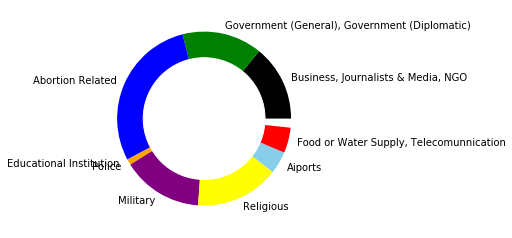

In [184]:
names=['Business, Journalists & Media, NGO', 'Government (General), Government (Diplomatic)', 'Abortion Related', 'Educational Institution','Police', 'Military', 'Religious', 'Aiports', 'Food or Water Supply, Telecomunnication']
size=[target_codes.count(1)/suma,target_codes.count(2)/suma,target_codes.count(3)/suma,target_codes.count(4)/suma,target_codes.count(5)/suma,target_codes.count(6)/suma,target_codes.count(7)/suma,target_codes.count(8)/suma,target_codes.count(9)/suma]
 

my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['black','green','blue','skyblue','orange','purple','yellow','skyblue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target types in the Europe')
plt.show()

